In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier



# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
df = pd.read_csv("data/anime_cleaned.csv", usecols=['title','type','source','episodes','rating', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
df_number_set = pd.read_csv("data/anime_cleaned.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
display(df)
display(df_number_set)

title type        source  \
0                                         Inu x Boku SS   TV         Manga   
1                                      Seto no Hanayome   TV         Manga   
2                                    Shugo Chara!! Doki   TV         Manga   
3                                         Princess Tutu   TV      Original   
4                                   Bakuman. 3rd Season   TV         Manga   
...                                                 ...  ...           ...   
6663                            Dokidoki Little Ooyasan  OVA         Other   
6664                        Wo Shi Jiang Xiaobai (2018)  ONA      Original   
6665              Genki Genki Non-tan: Obake Mura Meiro  OVA      Original   
6666                                Mr. Men Little Miss  ONA  Picture book   
6667  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...  OVA      Original   

      episodes                     rating  score  scored_by     rank  \
0           12  PG-13 - Teens 13 or older   7.63     139250   1274.0   
1           26  PG-13 - Teens 13 or older   7.89      91206    727.0   
2           51              PG - Children   7.55      37129   1508.0   
3           38  PG-13 - Teens 13 or older   8.21      36501    307.0   
4           25  PG-13 - Teens 13 or older   8.67     107767     50.0   
...        ...                        ...    ...        ...      ...   
6663         0                Rx - Hentai   9.52         33      NaN   
6664         1  PG-13 - Teens 13 or older   0.00          0  12719.0   
6665         1               G - All Ages   4.20          5  10253.0   
6666         0               G - All Ages   4.57          7  11396.0   
6667         1               G - All Ages   7.00          4  11396.0   

      popularity  members  favorites  duration_min  aired_from_year  
0            231   283882       2809          24.0           2012.0  
1            366   204003       2579          24.0           2007.0  
2           1173    70127        802          24.0           2008.0  
3            916    93312       3344          16.0           2002.0  
4            426   182765       2082          24.0           2012.0  
...          ...      ...        ...           ...              ...  
6663       10273      357         21          30.0           2018.0  
6664       10168      384          1           0.0           2018.0  
6665       14257       37          0          35.0           2015.0  
6666       14066       49          1           2.0           2013.0  
6667       14191       40          0          13.0           2017.0  

[6668 rows x 13 columns]

episodes  score  scored_by     rank  popularity  members  favorites  \
0           12   7.63     139250   1274.0         231   283882       2809   
1           26   7.89      91206    727.0         366   204003       2579   
2           51   7.55      37129   1508.0        1173    70127        802   
3           38   8.21      36501    307.0         916    93312       3344   
4           25   8.67     107767     50.0         426   182765       2082   
...        ...    ...        ...      ...         ...      ...        ...   
6663         0   9.52         33      NaN       10273      357         21   
6664         1   0.00          0  12719.0       10168      384          1   
6665         1   4.20          5  10253.0       14257       37          0   
6666         0   4.57          7  11396.0       14066       49          1   
6667         1   7.00          4  11396.0       14191       40          0   

      duration_min  aired_from_year  
0             24.0           2012.0  
1             24.0           2007.0  
2             24.0           2008.0  
3             16.0           2002.0  
4             24.0           2012.0  
...            ...              ...  
6663          30.0           2018.0  
6664           0.0           2018.0  
6665          35.0           2015.0  
6666           2.0           2013.0  
6667          13.0           2017.0  

[6668 rows x 9 columns]

In [3]:
df.describe(include = "all")

title  type source     episodes                     rating  \
count        6668  6668   6668  6668.000000                       6668   
unique       6668     6     15          NaN                          7   
top     Teekyuu 2    TV  Manga          NaN  PG-13 - Teens 13 or older   
freq            1  2980   2493          NaN                       3396   
mean          NaN   NaN    NaN    14.276395                        NaN   
std           NaN   NaN    NaN    40.906929                        NaN   
min           NaN   NaN    NaN     0.000000                        NaN   
25%           NaN   NaN    NaN     1.000000                        NaN   
50%           NaN   NaN    NaN     6.000000                        NaN   
75%           NaN   NaN    NaN    13.000000                        NaN   
max           NaN   NaN    NaN  1818.000000                        NaN   

              score     scored_by          rank    popularity       members  \
count   6668.000000  6.668000e+03   6312.000000   6668.000000  6.668000e+03   
unique          NaN           NaN           NaN           NaN           NaN   
top             NaN           NaN           NaN           NaN           NaN   
freq            NaN           NaN           NaN           NaN           NaN   
mean       6.848998  2.403501e+04   4327.645120   4479.515897  4.749037e+04   
std        0.927448  6.112103e+04   3170.699074   3453.338080  1.051211e+05   
min        0.000000  0.000000e+00      1.000000      1.000000  1.800000e+01   
25%        6.350000  6.812500e+02   1710.750000   1691.750000  2.222750e+03   
50%        6.930000  3.966000e+03   3754.500000   3629.500000  1.033650e+04   
75%        7.460000  1.976075e+04   6338.500000   6630.250000  4.336000e+04   
max        9.520000  1.009477e+06  12856.000000  14468.000000  1.456378e+06   

            favorites  duration_min  aired_from_year  
count     6668.000000   6668.000000      6668.000000  
unique            NaN           NaN              NaN  
top               NaN           NaN              NaN  
freq              NaN           NaN              NaN  
mean       670.365627     28.442167      2006.915267  
std       3823.072834     25.365980        10.381425  
min          0.000000      0.000000      1942.000000  
25%          3.000000     17.000000      2003.000000  
50%         21.000000     24.000000      2010.000000  
75%        142.000000     27.000000      2015.000000  
max     106895.000000    163.000000      2018.000000

In [4]:
df.isnull().sum()

title                0
type                 0
source               0
episodes             0
rating               0
score                0
scored_by            0
rank               356
popularity           0
members              0
favorites            0
duration_min         0
aired_from_year      0
dtype: int64

In [5]:
# dropping all null values
df.dropna(inplace = True) 


In [6]:
df

title type        source  \
0                                         Inu x Boku SS   TV         Manga   
1                                      Seto no Hanayome   TV         Manga   
2                                    Shugo Chara!! Doki   TV         Manga   
3                                         Princess Tutu   TV      Original   
4                                   Bakuman. 3rd Season   TV         Manga   
...                                                 ...  ...           ...   
6662                                 Ling Yu 4th Season  ONA         Novel   
6664                        Wo Shi Jiang Xiaobai (2018)  ONA      Original   
6665              Genki Genki Non-tan: Obake Mura Meiro  OVA      Original   
6666                                Mr. Men Little Miss  ONA  Picture book   
6667  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...  OVA      Original   

      episodes                     rating  score  scored_by     rank  \
0           12  PG-13 - Teens 13 or older   7.63     139250   1274.0   
1           26  PG-13 - Teens 13 or older   7.89      91206    727.0   
2           51              PG - Children   7.55      37129   1508.0   
3           38  PG-13 - Teens 13 or older   8.21      36501    307.0   
4           25  PG-13 - Teens 13 or older   8.67     107767     50.0   
...        ...                        ...    ...        ...      ...   
6662        12  PG-13 - Teens 13 or older   7.53         17  11126.0   
6664         1  PG-13 - Teens 13 or older   0.00          0  12719.0   
6665         1               G - All Ages   4.20          5  10253.0   
6666         0               G - All Ages   4.57          7  11396.0   
6667         1               G - All Ages   7.00          4  11396.0   

      popularity  members  favorites  duration_min  aired_from_year  
0            231   283882       2809          24.0           2012.0  
1            366   204003       2579          24.0           2007.0  
2           1173    70127        802          24.0           2008.0  
3            916    93312       3344          16.0           2002.0  
4            426   182765       2082          24.0           2012.0  
...          ...      ...        ...           ...              ...  
6662       12779      126          0          13.0           2016.0  
6664       10168      384          1           0.0           2018.0  
6665       14257       37          0          35.0           2015.0  
6666       14066       49          1           2.0           2013.0  
6667       14191       40          0          13.0           2017.0  

[6312 rows x 13 columns]

In [7]:
def change_column_dtype(columns_to_transform,type):
    df[columns_to_transform] = df[columns_to_transform].astype(type)

    return df.dtypes

df.dtypes

title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank               float64
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year    float64
dtype: object

In [8]:
change_column_dtype(['rank','aired_from_year'],int)


title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank                 int32
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year      int32
dtype: object

## Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [87]:
# copy dataframe to replace with dummies columns
df_le = df.copy(deep=True)

### LabelEncode column ['source']

In [88]:
le = preprocessing.LabelEncoder()
# Created dummies for source column

le.fit(df_le.source)
df_le.source = le.fit_transform(df_le.source)


# Made tuple for graphing labels instead of numerical data
df_list_source = list(le.classes_)          # df.source.unique()

In [89]:
df_list_source

['4-koma manga',
 'Book',
 'Card game',
 'Digital manga',
 'Game',
 'Light novel',
 'Manga',
 'Music',
 'Novel',
 'Original',
 'Other',
 'Picture book',
 'Radio',
 'Visual novel',
 'Web manga']

In [90]:
df_list_source[0]

'4-koma manga'

In [91]:
list(le.inverse_transform([0]))

['4-koma manga']

In [92]:
print('After LabelEncoder(): \n')
for i in range(0,len(list(le.classes_))):
    print(f'Column {le.inverse_transform([i])} is replaced with dummy variable {[i]}')

After LabelEncoder(): 

Column ['4-koma manga'] is replaced with dummy variable [0]
Column ['Book'] is replaced with dummy variable [1]
Column ['Card game'] is replaced with dummy variable [2]
Column ['Digital manga'] is replaced with dummy variable [3]
Column ['Game'] is replaced with dummy variable [4]
Column ['Light novel'] is replaced with dummy variable [5]
Column ['Manga'] is replaced with dummy variable [6]
Column ['Music'] is replaced with dummy variable [7]
Column ['Novel'] is replaced with dummy variable [8]
Column ['Original'] is replaced with dummy variable [9]
Column ['Other'] is replaced with dummy variable [10]
Column ['Picture book'] is replaced with dummy variable [11]
Column ['Radio'] is replaced with dummy variable [12]
Column ['Visual novel'] is replaced with dummy variable [13]
Column ['Web manga'] is replaced with dummy variable [14]


### LabelEncode column ['type']

In [93]:
# Auto encodes any categorical column in a dataframe to numerical values.

def dummyEncode_column(column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[column.name] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)


In [94]:
dummyEncode_column(df_le.type)

After passing column ["type"] through LabelEncoder(): 

Categorical value [0] is replaced with numerical value [0]
Categorical value [1] is replaced with numerical value [1]
Categorical value [2] is replaced with numerical value [2]
Categorical value [3] is replaced with numerical value [3]
Categorical value [4] is replaced with numerical value [4]
Categorical value [5] is replaced with numerical value [5]

[df_type_categories] =  [0, 1, 2, 3, 4, 5]


title  type        source  \
0                                         Inu x Boku SS     5         Manga   
1                                      Seto no Hanayome     5         Manga   
2                                    Shugo Chara!! Doki     5         Manga   
3                                         Princess Tutu     5      Original   
4                                   Bakuman. 3rd Season     5         Manga   
...                                                 ...   ...           ...   
6662                                 Ling Yu 4th Season     2         Novel   
6664                        Wo Shi Jiang Xiaobai (2018)     2      Original   
6665              Genki Genki Non-tan: Obake Mura Meiro     3      Original   
6666                                Mr. Men Little Miss     2  Picture book   
6667  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...     3      Original   

      episodes  rating  score  scored_by   rank  popularity  members  \
0           12       3   7.63     139250   1274         231   283882   
1           26       3   7.89      91206    727         366   204003   
2           51       2   7.55      37129   1508        1173    70127   
3           38       3   8.21      36501    307         916    93312   
4           25       3   8.67     107767     50         426   182765   
...        ...     ...    ...        ...    ...         ...      ...   
6662        12       3   7.53         17  11126       12779      126   
6664         1       3   0.00          0  12719       10168      384   
6665         1       0   4.20          5  10253       14257       37   
6666         0       0   4.57          7  11396       14066       49   
6667         1       0   7.00          4  11396       14191       40   

      favorites  duration_min  aired_from_year  
0          2809          24.0             2012  
1          2579          24.0             2007  
2           802          24.0             2008  
3          3344          16.0             2002  
4          2082          24.0             2012  
...         ...           ...              ...  
6662          0          13.0             2016  
6664          1           0.0             2018  
6665          0          35.0             2015  
6666          1           2.0             2013  
6667          0          13.0             2017  

[6312 rows x 13 columns]

In [95]:
# # Created dummies for type column
# le.fit(df_le.type)
# df_le.type = le.fit_transform(df_le.type)
# # le.fit_transform(df_le.type)


# # Made tuple for graphing labels instead of numerical data
# df_list_type = list(le.classes_)                           # df.type.unique()

# print(list(le.classes_))

# print(list(le.inverse_transform([0,1,2,3,4,5])))

### LabelEncode column ['rating']

In [96]:
dummyEncode_column(df_le.rating)

After passing column ["rating"] through LabelEncoder(): 

Categorical value [0] is replaced with numerical value [0]
Categorical value [1] is replaced with numerical value [1]
Categorical value [2] is replaced with numerical value [2]
Categorical value [3] is replaced with numerical value [3]
Categorical value [4] is replaced with numerical value [4]
Categorical value [5] is replaced with numerical value [5]
Categorical value [6] is replaced with numerical value [6]

[df_rating_categories] =  [0, 1, 2, 3, 4, 5, 6]


title  type        source  \
0                                         Inu x Boku SS     5         Manga   
1                                      Seto no Hanayome     5         Manga   
2                                    Shugo Chara!! Doki     5         Manga   
3                                         Princess Tutu     5      Original   
4                                   Bakuman. 3rd Season     5         Manga   
...                                                 ...   ...           ...   
6662                                 Ling Yu 4th Season     2         Novel   
6664                        Wo Shi Jiang Xiaobai (2018)     2      Original   
6665              Genki Genki Non-tan: Obake Mura Meiro     3      Original   
6666                                Mr. Men Little Miss     2  Picture book   
6667  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...     3      Original   

      episodes  rating  score  scored_by   rank  popularity  members  \
0           12       3   7.63     139250   1274         231   283882   
1           26       3   7.89      91206    727         366   204003   
2           51       2   7.55      37129   1508        1173    70127   
3           38       3   8.21      36501    307         916    93312   
4           25       3   8.67     107767     50         426   182765   
...        ...     ...    ...        ...    ...         ...      ...   
6662        12       3   7.53         17  11126       12779      126   
6664         1       3   0.00          0  12719       10168      384   
6665         1       0   4.20          5  10253       14257       37   
6666         0       0   4.57          7  11396       14066       49   
6667         1       0   7.00          4  11396       14191       40   

      favorites  duration_min  aired_from_year  
0          2809          24.0             2012  
1          2579          24.0             2007  
2           802          24.0             2008  
3          3344          16.0             2002  
4          2082          24.0             2012  
...         ...           ...              ...  
6662          0          13.0             2016  
6664          1           0.0             2018  
6665          0          35.0             2015  
6666          1           2.0             2013  
6667          0          13.0             2017  

[6312 rows x 13 columns]

In [97]:
# Created dummies for rating column
le.fit(df_le.rating)
df_le.rating = le.fit_transform(df_le.rating)


# Made tuple for graphing labels instead of numerical data
df_list_rating = list(le.classes_)                   # df.rating.unique()

In [98]:
df_list_rating

[0, 1, 2, 3, 4, 5, 6]

In [99]:
df_le

title  type  source  \
0                                         Inu x Boku SS     5       6   
1                                      Seto no Hanayome     5       6   
2                                    Shugo Chara!! Doki     5       6   
3                                         Princess Tutu     5       9   
4                                   Bakuman. 3rd Season     5       6   
...                                                 ...   ...     ...   
6662                                 Ling Yu 4th Season     2       8   
6664                        Wo Shi Jiang Xiaobai (2018)     2       9   
6665              Genki Genki Non-tan: Obake Mura Meiro     3       9   
6666                                Mr. Men Little Miss     2      11   
6667  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...     3       9   

      episodes  rating  score  scored_by   rank  popularity  members  \
0           12       3   7.63     139250   1274         231   283882   
1           26       3   7.89      91206    727         366   204003   
2           51       2   7.55      37129   1508        1173    70127   
3           38       3   8.21      36501    307         916    93312   
4           25       3   8.67     107767     50         426   182765   
...        ...     ...    ...        ...    ...         ...      ...   
6662        12       3   7.53         17  11126       12779      126   
6664         1       3   0.00          0  12719       10168      384   
6665         1       0   4.20          5  10253       14257       37   
6666         0       0   4.57          7  11396       14066       49   
6667         1       0   7.00          4  11396       14191       40   

      favorites  duration_min  aired_from_year  
0          2809          24.0             2012  
1          2579          24.0             2007  
2           802          24.0             2008  
3          3344          16.0             2002  
4          2082          24.0             2012  
...         ...           ...              ...  
6662          0          13.0             2016  
6664          1           0.0             2018  
6665          0          35.0             2015  
6666          1           2.0             2013  
6667          0          13.0             2017  

[6312 rows x 13 columns]

## Correlation

In [22]:

df_le_predictors = df_le.iloc[:,1:-1]
corr= df_le_predictors.corr()
corr

source  episodes    rating     score  scored_by      rank  \
source        1.000000 -0.015172 -0.065669 -0.155177  -0.047142  0.169341   
episodes     -0.015172  1.000000 -0.085536  0.073116   0.063172 -0.049064   
rating       -0.065669 -0.085536  1.000000  0.267665   0.194191 -0.310402   
score        -0.155177  0.073116  0.267665  1.000000   0.382646 -0.898747   
scored_by    -0.047142  0.063172  0.194191  0.382646   1.000000 -0.356686   
rank          0.169341 -0.049064 -0.310402 -0.898747  -0.356686  1.000000   
popularity    0.135183 -0.005915 -0.505422 -0.691818  -0.424704  0.777302   
members      -0.050129  0.073563  0.219982  0.416384   0.987066 -0.391524   
favorites    -0.000246  0.104417  0.088242  0.257017   0.794090 -0.208503   
duration_min -0.046960 -0.107056  0.093910  0.303784   0.045479 -0.294528   

              popularity   members  favorites  duration_min  
source          0.135183 -0.050129  -0.000246     -0.046960  
episodes       -0.005915  0.073563   0.104417     -0.107056  
rating         -0.505422  0.219982   0.088242      0.093910  
score          -0.691818  0.416384   0.257017      0.303784  
scored_by      -0.424704  0.987066   0.794090      0.045479  
rank            0.777302 -0.391524  -0.208503     -0.294528  
popularity      1.000000 -0.474118  -0.210061     -0.159520  
members        -0.474118  1.000000   0.781962      0.038604  
favorites      -0.210061  0.781962   1.000000      0.002212  
duration_min   -0.159520  0.038604   0.002212      1.000000

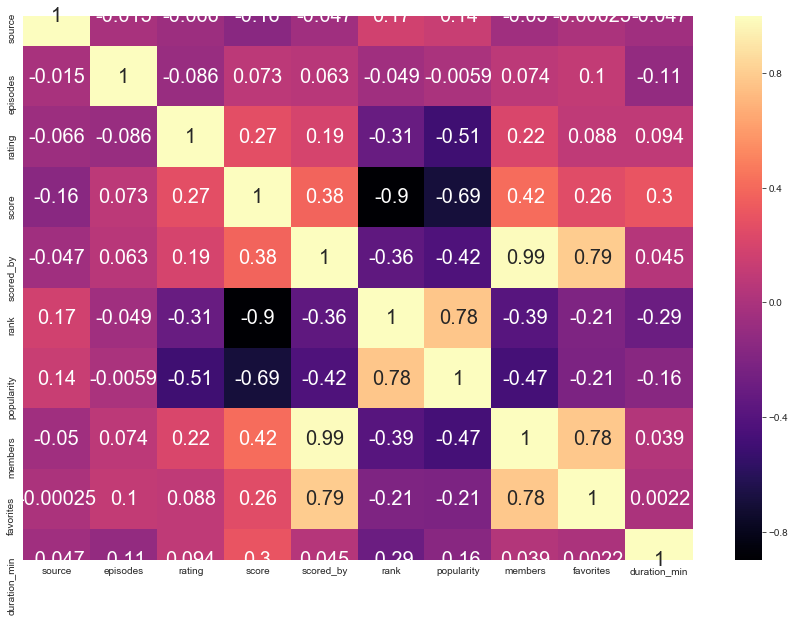

In [23]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


In [24]:
# Checking correlations in data where the correlation is greater then 75% (highly correlated)
corr[abs(df_le_predictors.corr() > 0.75)]

source  episodes  rating  score  scored_by      rank  \
source           1.0       NaN     NaN    NaN        NaN       NaN   
episodes         NaN       1.0     NaN    NaN        NaN       NaN   
rating           NaN       NaN     1.0    NaN        NaN       NaN   
score            NaN       NaN     NaN    1.0        NaN       NaN   
scored_by        NaN       NaN     NaN    NaN   1.000000       NaN   
rank             NaN       NaN     NaN    NaN        NaN  1.000000   
popularity       NaN       NaN     NaN    NaN        NaN  0.777302   
members          NaN       NaN     NaN    NaN   0.987066       NaN   
favorites        NaN       NaN     NaN    NaN   0.794090       NaN   
duration_min     NaN       NaN     NaN    NaN        NaN       NaN   

              popularity   members  favorites  duration_min  
source               NaN       NaN        NaN           NaN  
episodes             NaN       NaN        NaN           NaN  
rating               NaN       NaN        NaN           NaN  
score                NaN       NaN        NaN           NaN  
scored_by            NaN  0.987066   0.794090           NaN  
rank            0.777302       NaN        NaN           NaN  
popularity      1.000000       NaN        NaN           NaN  
members              NaN  1.000000   0.781962           NaN  
favorites            NaN  0.781962   1.000000           NaN  
duration_min         NaN       NaN        NaN           1.0

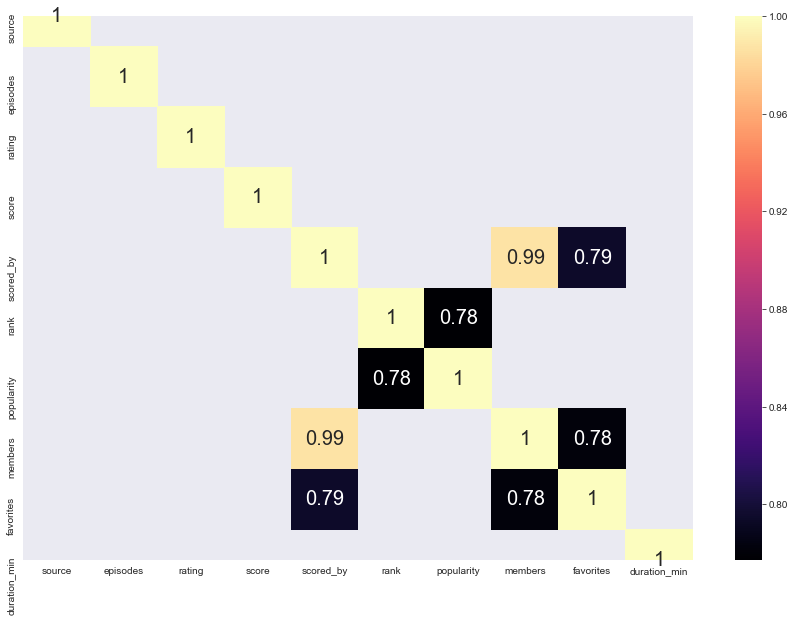

In [25]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_le_predictors.corr() > 0.75)], annot = True, annot_kws ={'size':20}, cmap='magma')

In [26]:
# Checking correlations in data where the correlation is less then -75% (highly inversely correlated)
corr[abs(df_le_predictors.corr() < -0.75)] 

source  episodes  rating     score  scored_by      rank  \
source           NaN       NaN     NaN       NaN        NaN       NaN   
episodes         NaN       NaN     NaN       NaN        NaN       NaN   
rating           NaN       NaN     NaN       NaN        NaN       NaN   
score            NaN       NaN     NaN       NaN        NaN -0.898747   
scored_by        NaN       NaN     NaN       NaN        NaN       NaN   
rank             NaN       NaN     NaN -0.898747        NaN       NaN   
popularity       NaN       NaN     NaN       NaN        NaN       NaN   
members          NaN       NaN     NaN       NaN        NaN       NaN   
favorites        NaN       NaN     NaN       NaN        NaN       NaN   
duration_min     NaN       NaN     NaN       NaN        NaN       NaN   

              popularity  members  favorites  duration_min  
source               NaN      NaN        NaN           NaN  
episodes             NaN      NaN        NaN           NaN  
rating               NaN      NaN        NaN           NaN  
score                NaN      NaN        NaN           NaN  
scored_by            NaN      NaN        NaN           NaN  
rank                 NaN      NaN        NaN           NaN  
popularity           NaN      NaN        NaN           NaN  
members              NaN      NaN        NaN           NaN  
favorites            NaN      NaN        NaN           NaN  
duration_min         NaN      NaN        NaN           NaN

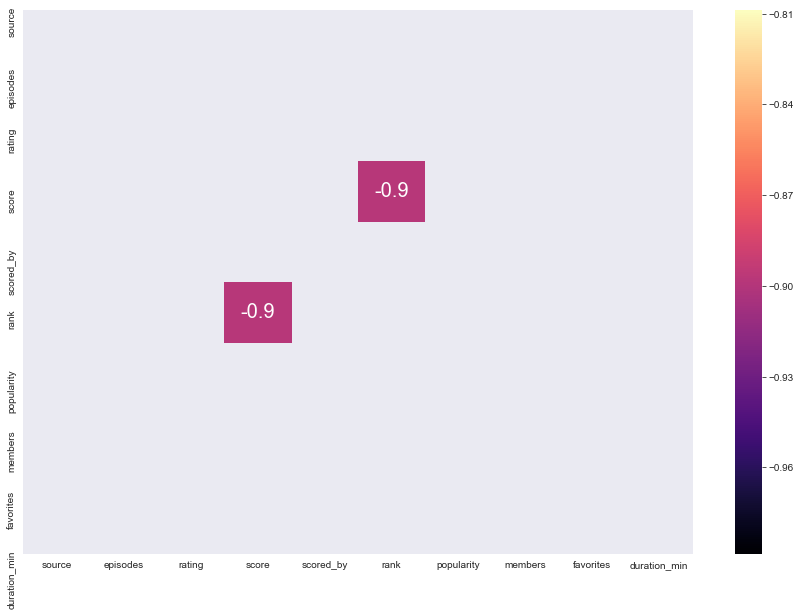

In [27]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_le_predictors.corr() < -0.75)] , annot = True, annot_kws ={'size':20}, cmap='magma')

### OLM for rank~score

In [28]:
abs(corr).sort_values(by = 'rank',  ascending= False)['rank']
data_reg_simple = ols(formula= "rank~score", data=df_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 2.651e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:14:53   Log-Likelihood:                -54637.
No. Observations:                6312   AIC:                         1.093e+05
Df Residuals:                    6310   BIC:                         1.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.514e+04    128.987    194.868      0.000    2.49e+04    2.54e+04
score      -3031.4230     18.618   -162.822      0.000   -3067.921   -2994.925
==============================================================================
Omnibus:                     3194.389   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177636.065
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      28.779   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for popularity~rank

In [29]:
abs(corr).sort_values(by = 'popularity',  ascending= False)['popularity']
data_reg_simple = ols(formula= "popularity~rank", data=df_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     9632.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:14:53   Log-Likelihood:                -57585.
No. Observations:                6312   AIC:                         1.152e+05
Df Residuals:                    6310   BIC:                         1.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    699.3556     47.238     14.805      0.000     606.754     791.957
rank           0.8642      0.009     98.145      0.000       0.847       0.881
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.519
Skew:                           0.022   Prob(JB):                        0.772
Kurtosis:                       2.998   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for score~popularity

In [30]:
abs(corr).sort_values(by = 'score',  ascending= False)['score']
data_reg_simple = ols(formula= "score~popularity", data=df_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     5792.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:14:53   Log-Likelihood:                -6510.2
No. Observations:                6312   AIC:                         1.302e+04
Df Residuals:                    6310   BIC:                         1.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6830      0.014    559.150      0.000       7.656       7.710
popularity    -0.0002   2.42e-06    -76.107      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     1510.313   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7590.225
Skew:                          -1.062   Prob(JB):                         0.00
Kurtosis:                       7.935   Cond. No.                     9.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for members~scored_by

In [31]:
abs(corr).sort_values(by = 'members',  ascending= False)['members']
data_reg_simple = ols(formula= "members~scored_by", data=df_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                members   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.392e+05
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:14:54   Log-Likelihood:                -70531.
No. Observations:                6312   AIC:                         1.411e+05
Df Residuals:                    6310   BIC:                         1.411e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7021.2227    234.020     30.003      0.000    6562.463    7479.982
scored_by      1.6961      0.003    489.098      0.000       1.689       1.703
==============================================================================
Omnibus:                     2598.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           592802.892
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                      50.450   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

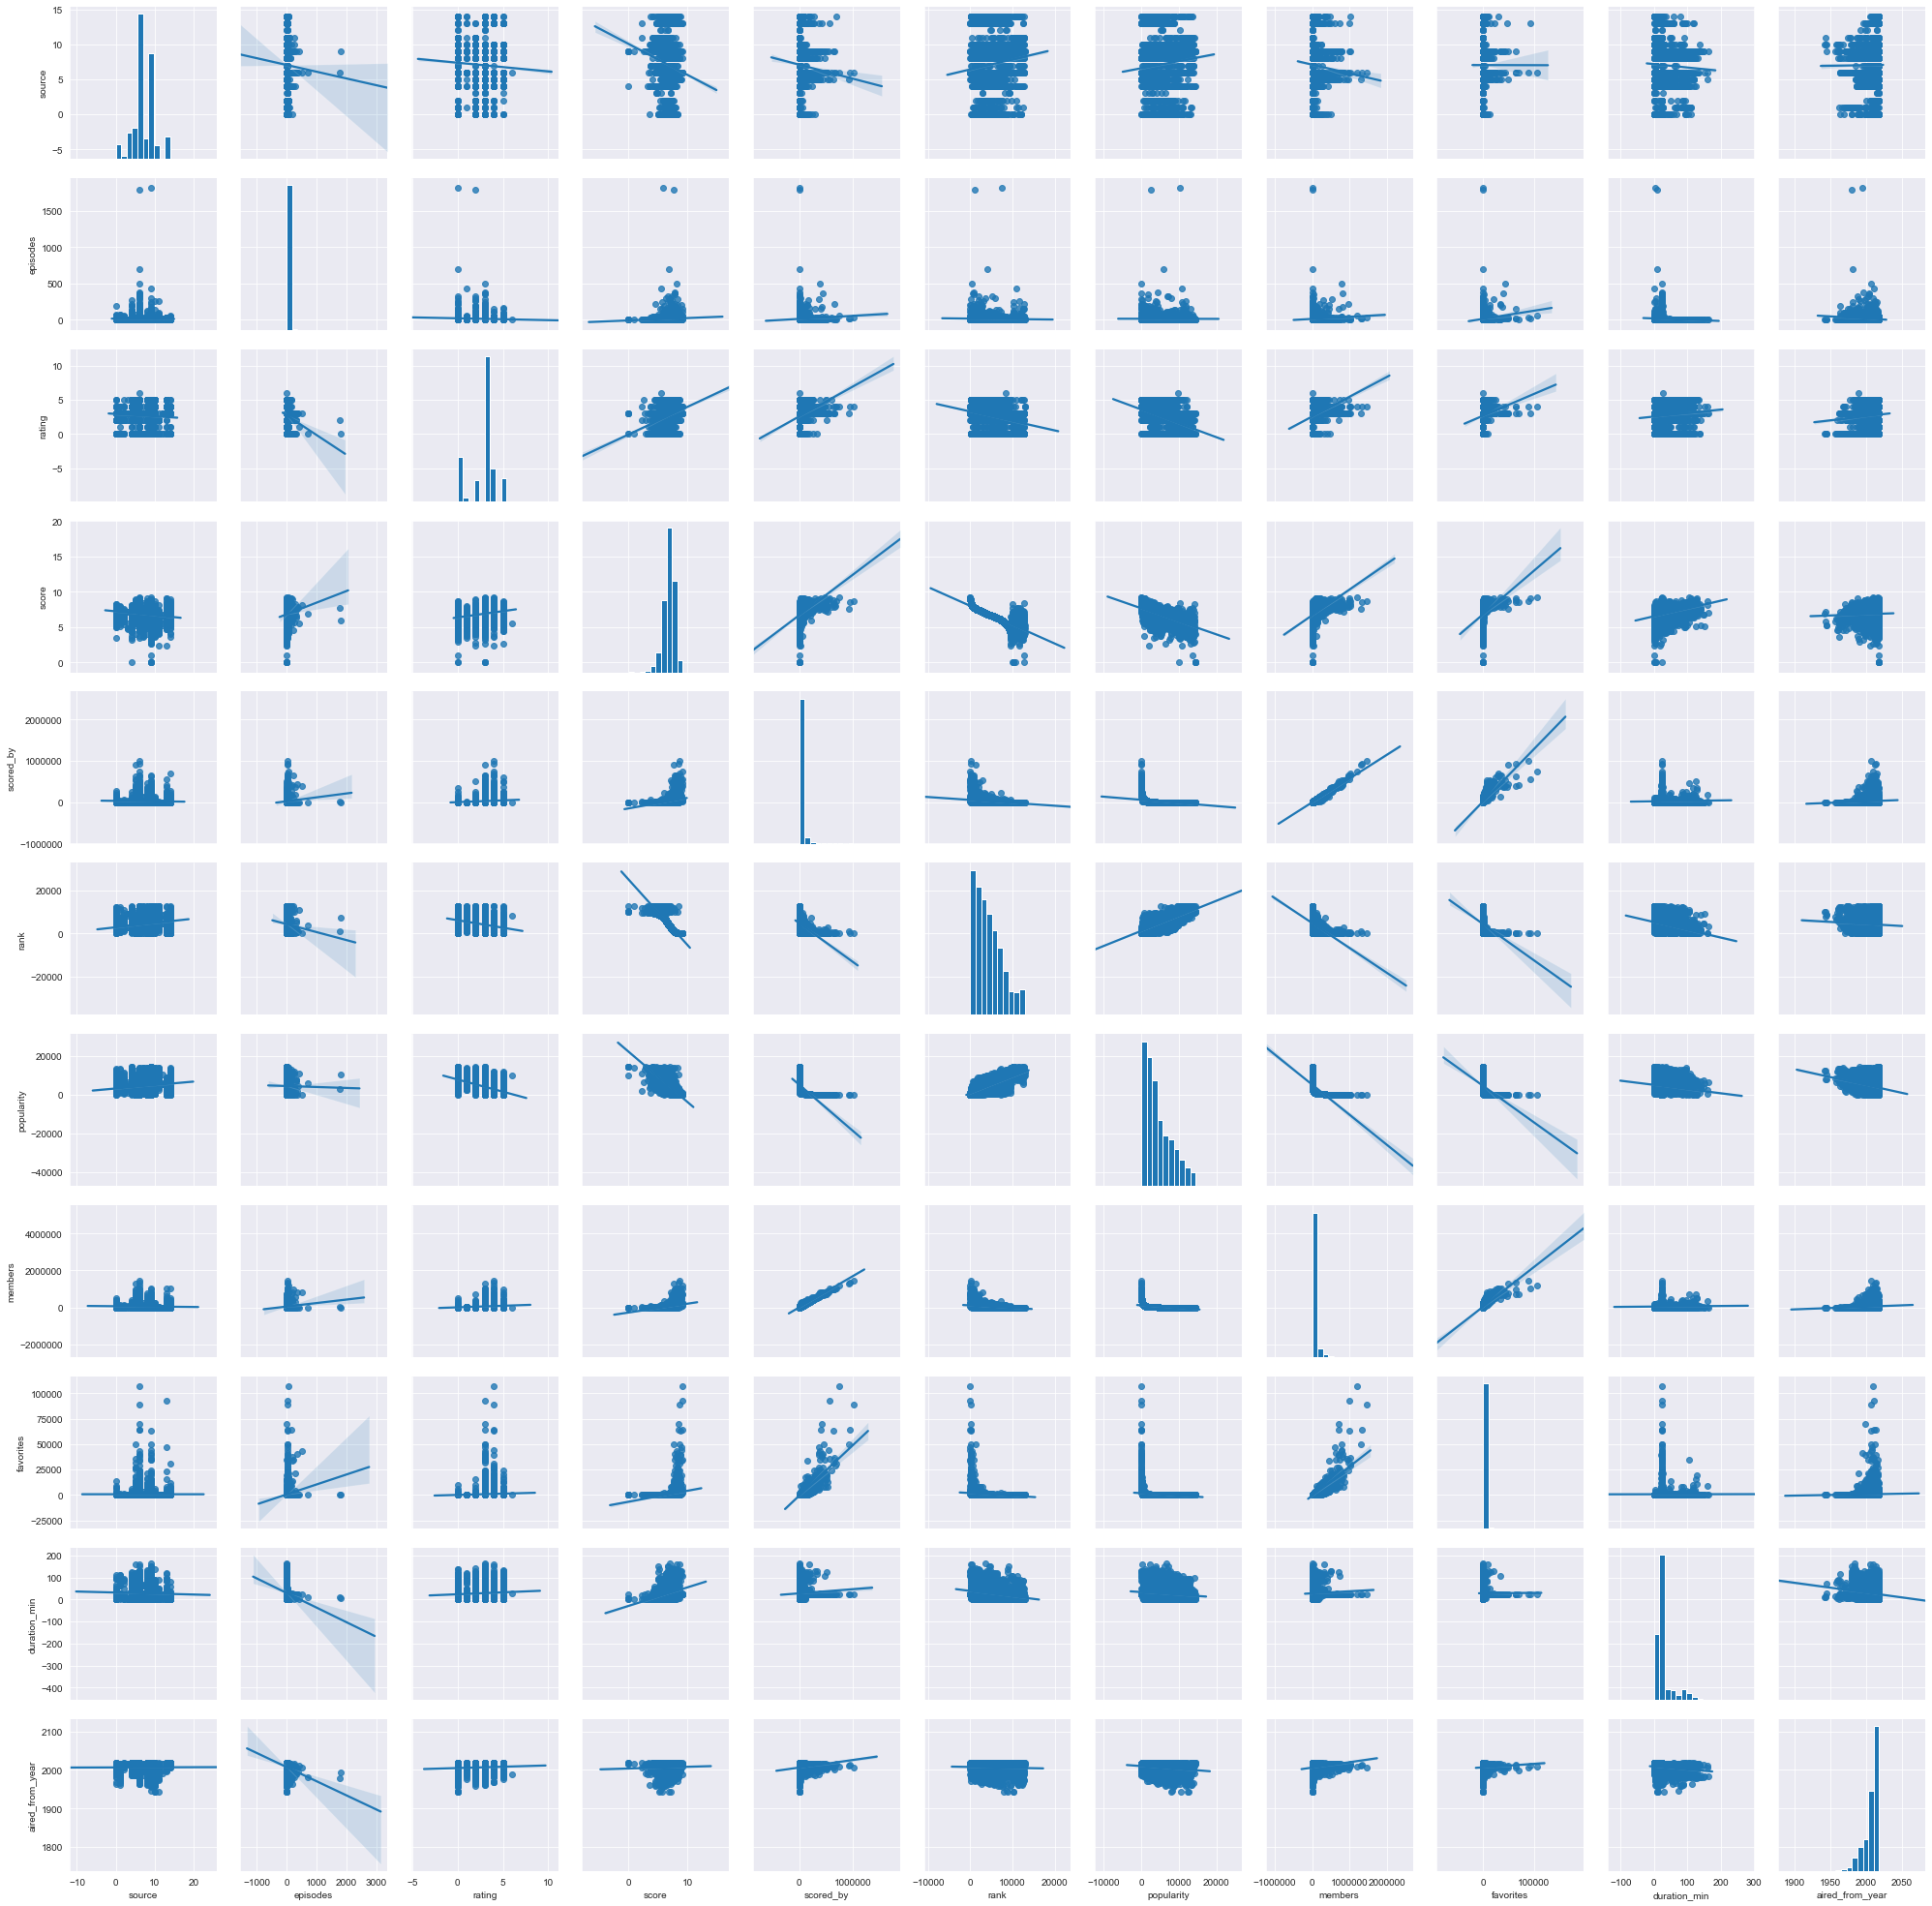

In [32]:
sns.pairplot(df_le, kind='reg' )

In [33]:
# sns.pairplot(df_le, hue ='type')

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


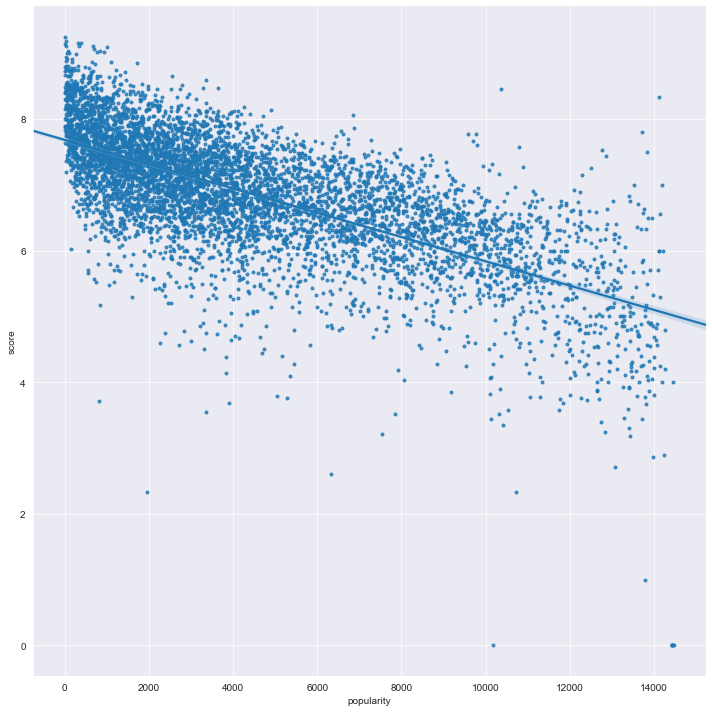

In [34]:

sns.lmplot(x='popularity', y='score', data= df_le, markers=[ "."], fit_reg =True,size = 10)


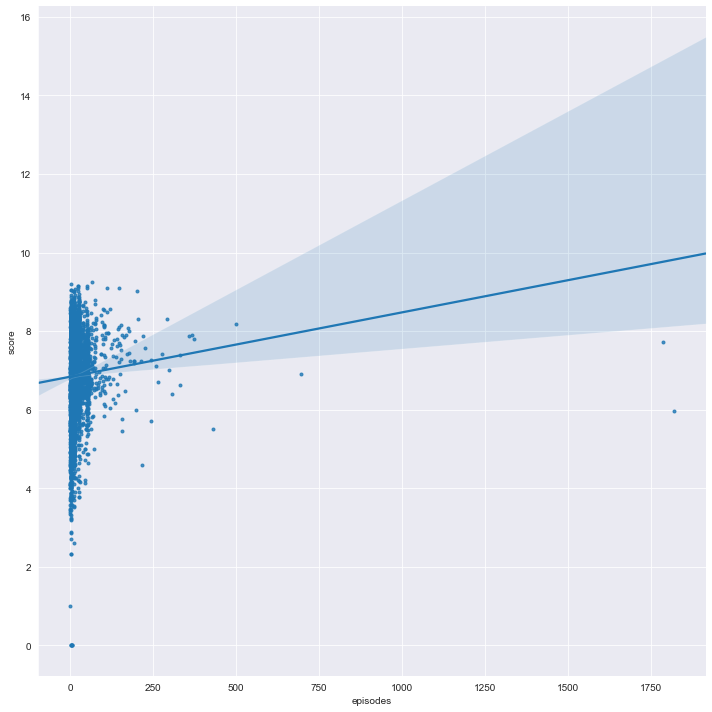

In [35]:
sns.lmplot(x='episodes', y='score', data= df_le, markers=[ "."], fit_reg =True,size = 10)

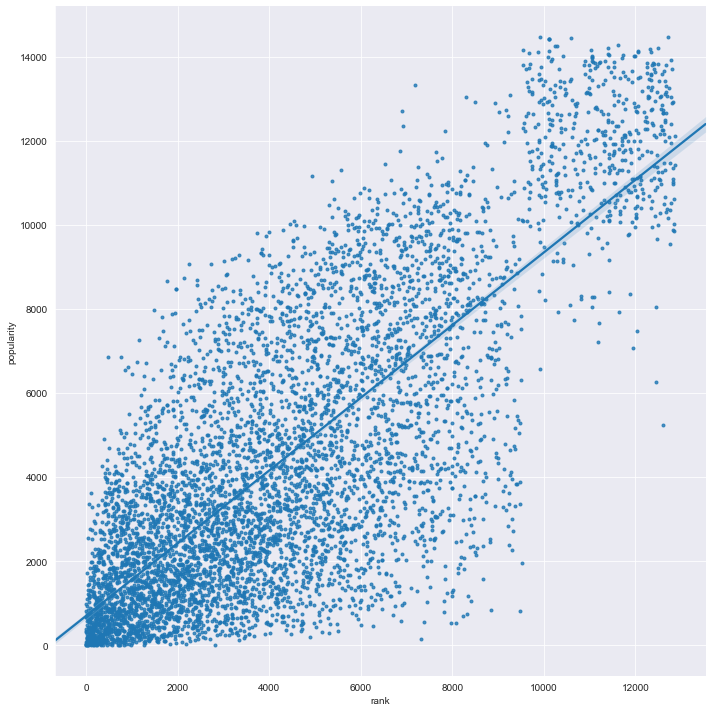

In [36]:
sns.lmplot(x='rank', y='popularity', data= df_le, markers=["."], fit_reg =True,size = 10)

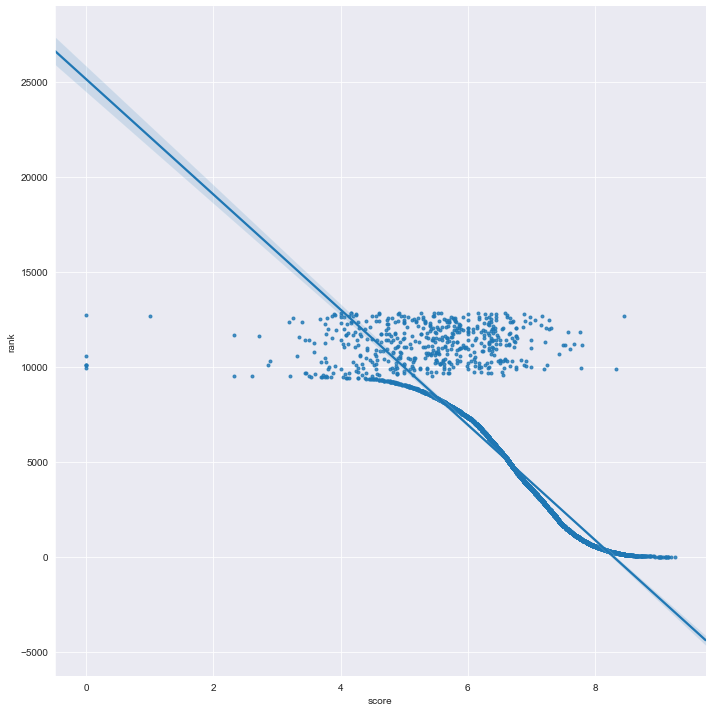

In [37]:
sns.lmplot(x='score', y='rank', data= df_le, markers=[ "."], fit_reg =True,size = 10)

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x21dc28343c8>,
 <a list of 6 Text xticklabel objects>)

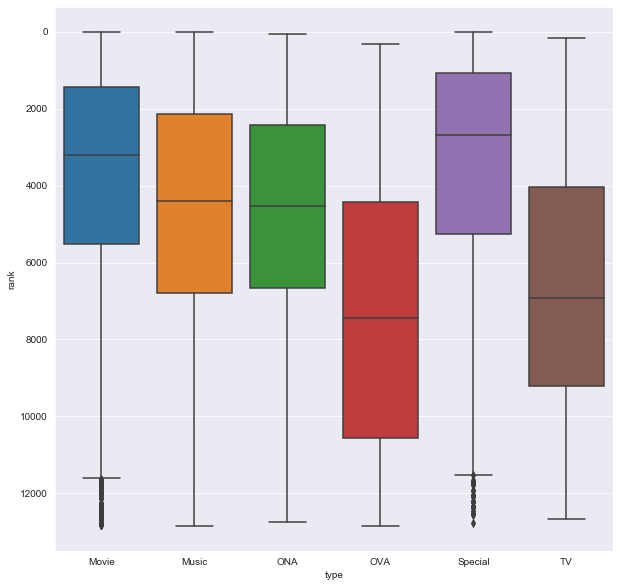

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_le, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x21dc35d40c8>,
 <a list of 6 Text xticklabel objects>)

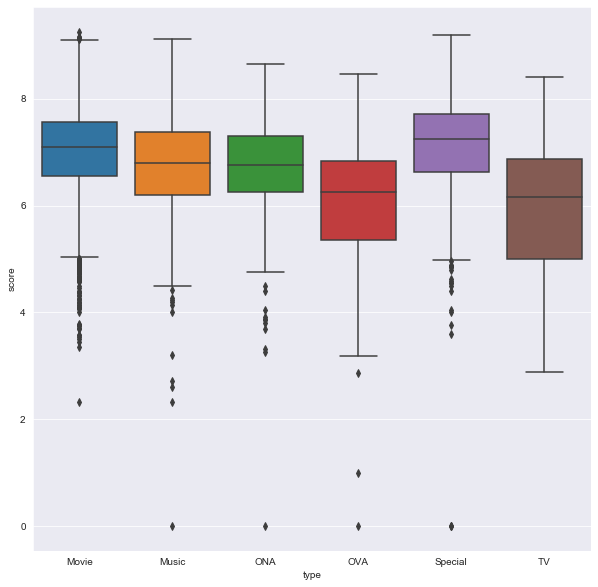

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df_le, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

([<matplotlib.axis.XTick at 0x21dc344fcc8>,
 <a list of 15 Text xticklabel objects>)

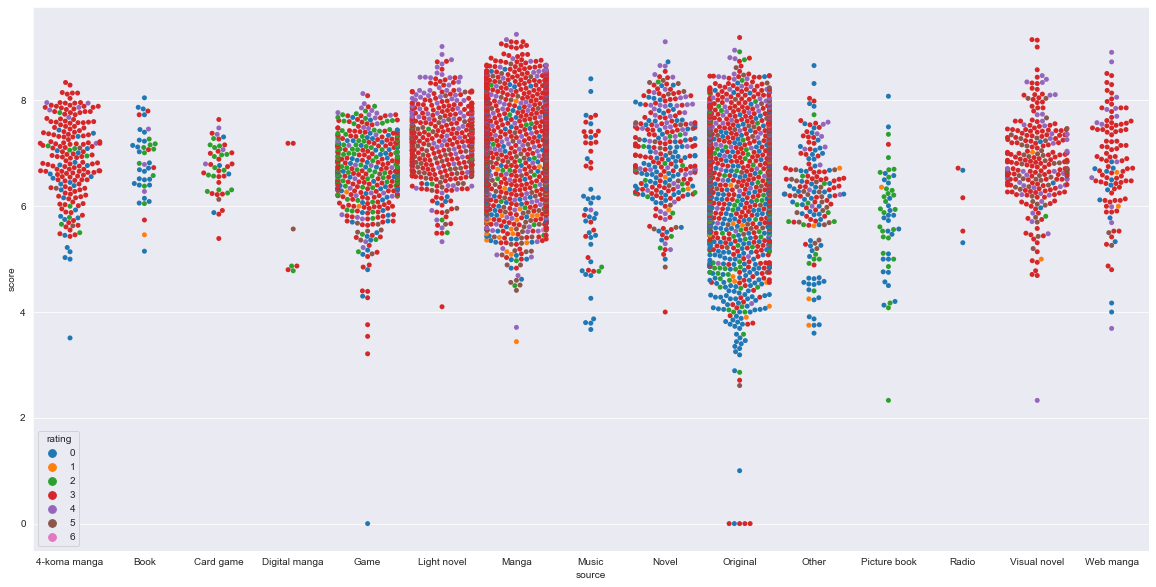

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=df_le, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(df_list_source)), df_list_source)


In [41]:
df_le.columns

Index(['title', 'type', 'source', 'episodes', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'duration_min',
       'aired_from_year'],
      dtype='object')

C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


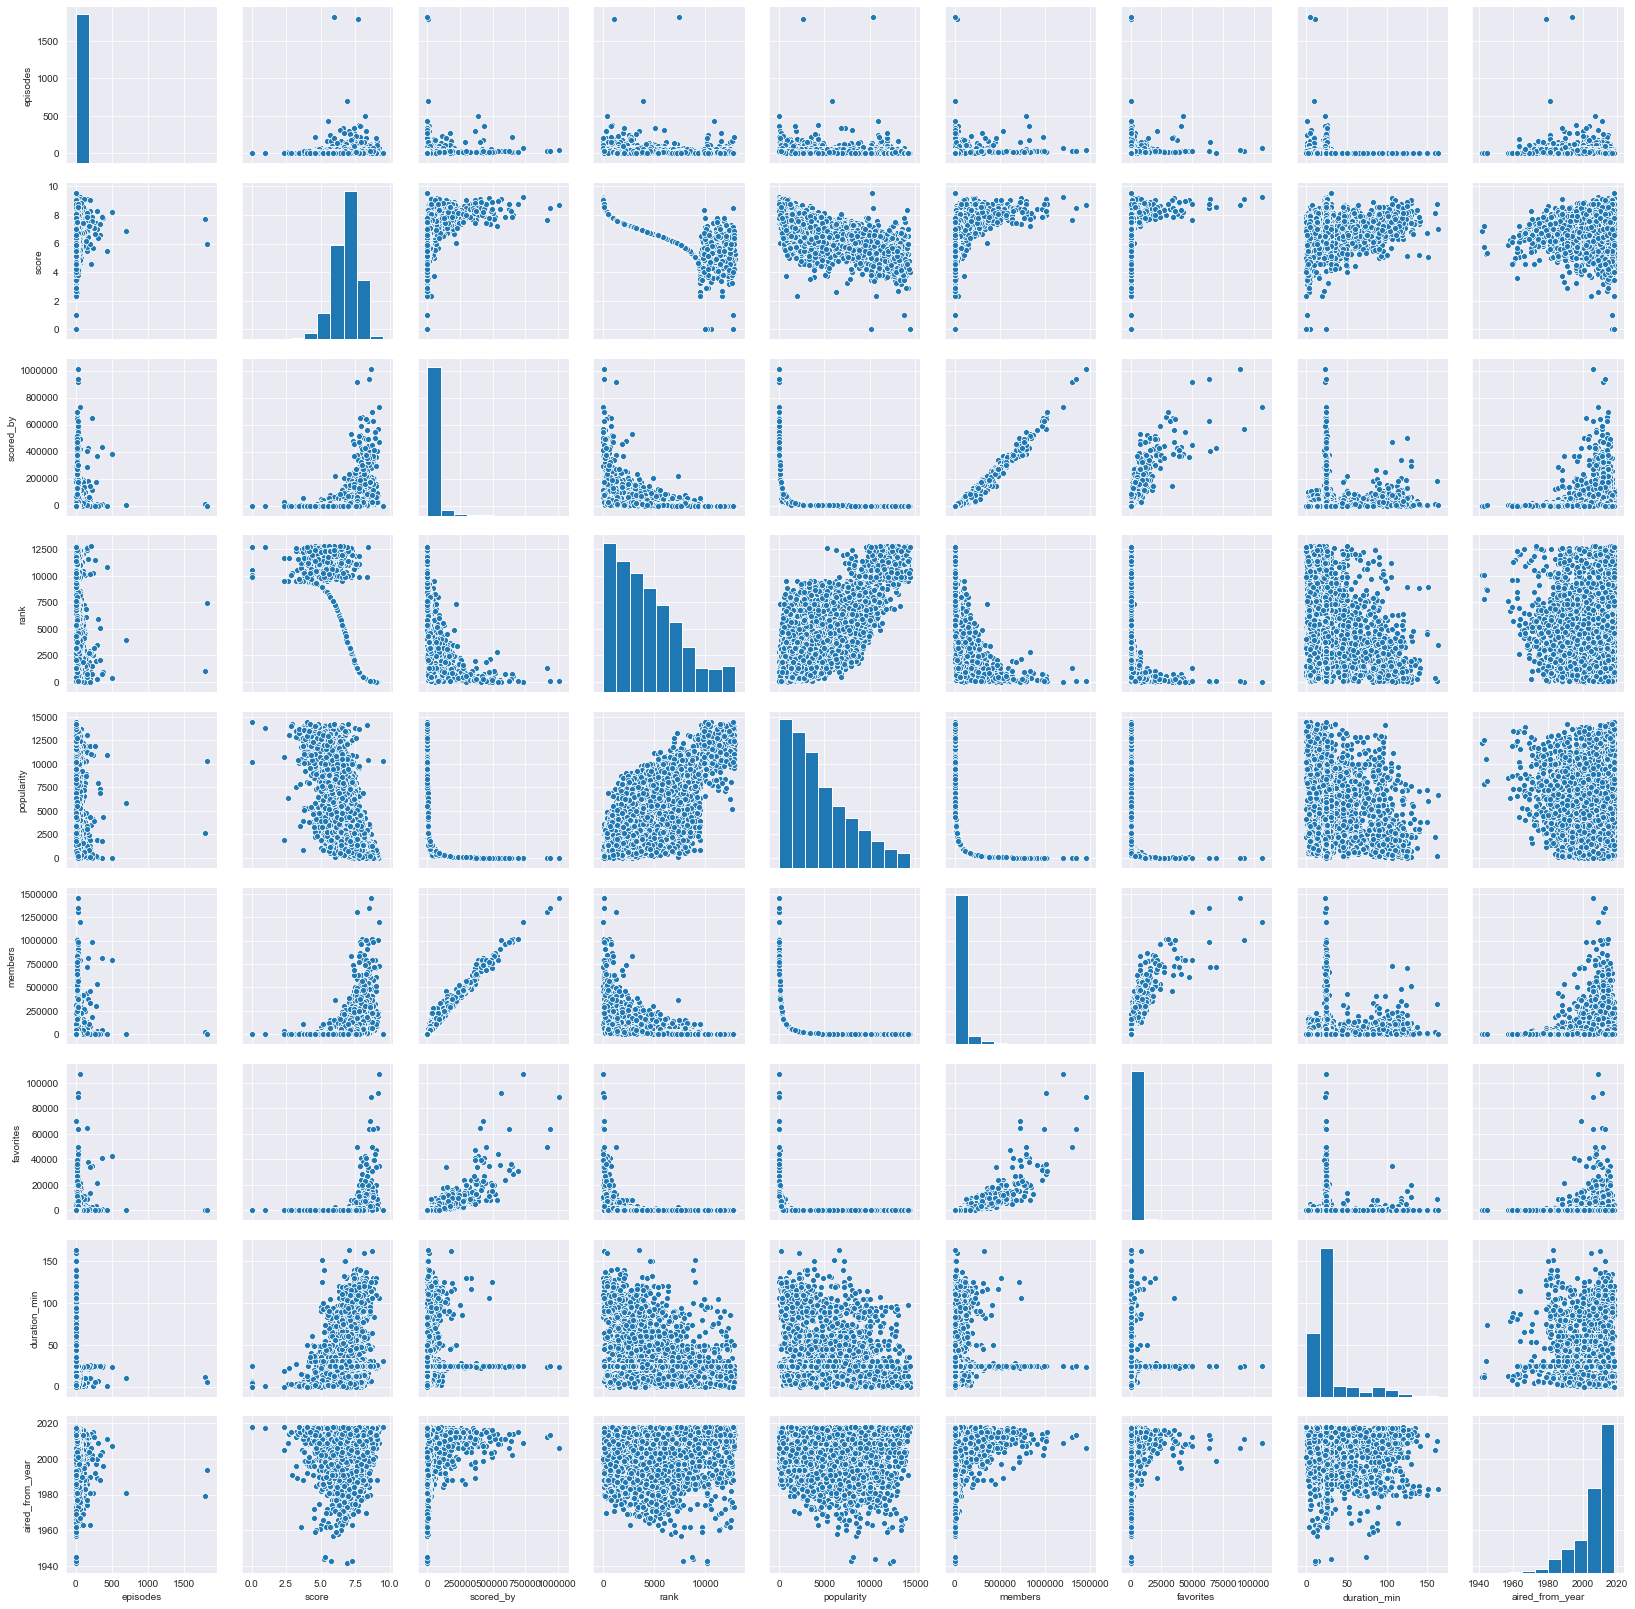

In [42]:
sns.pairplot(df_number_set)

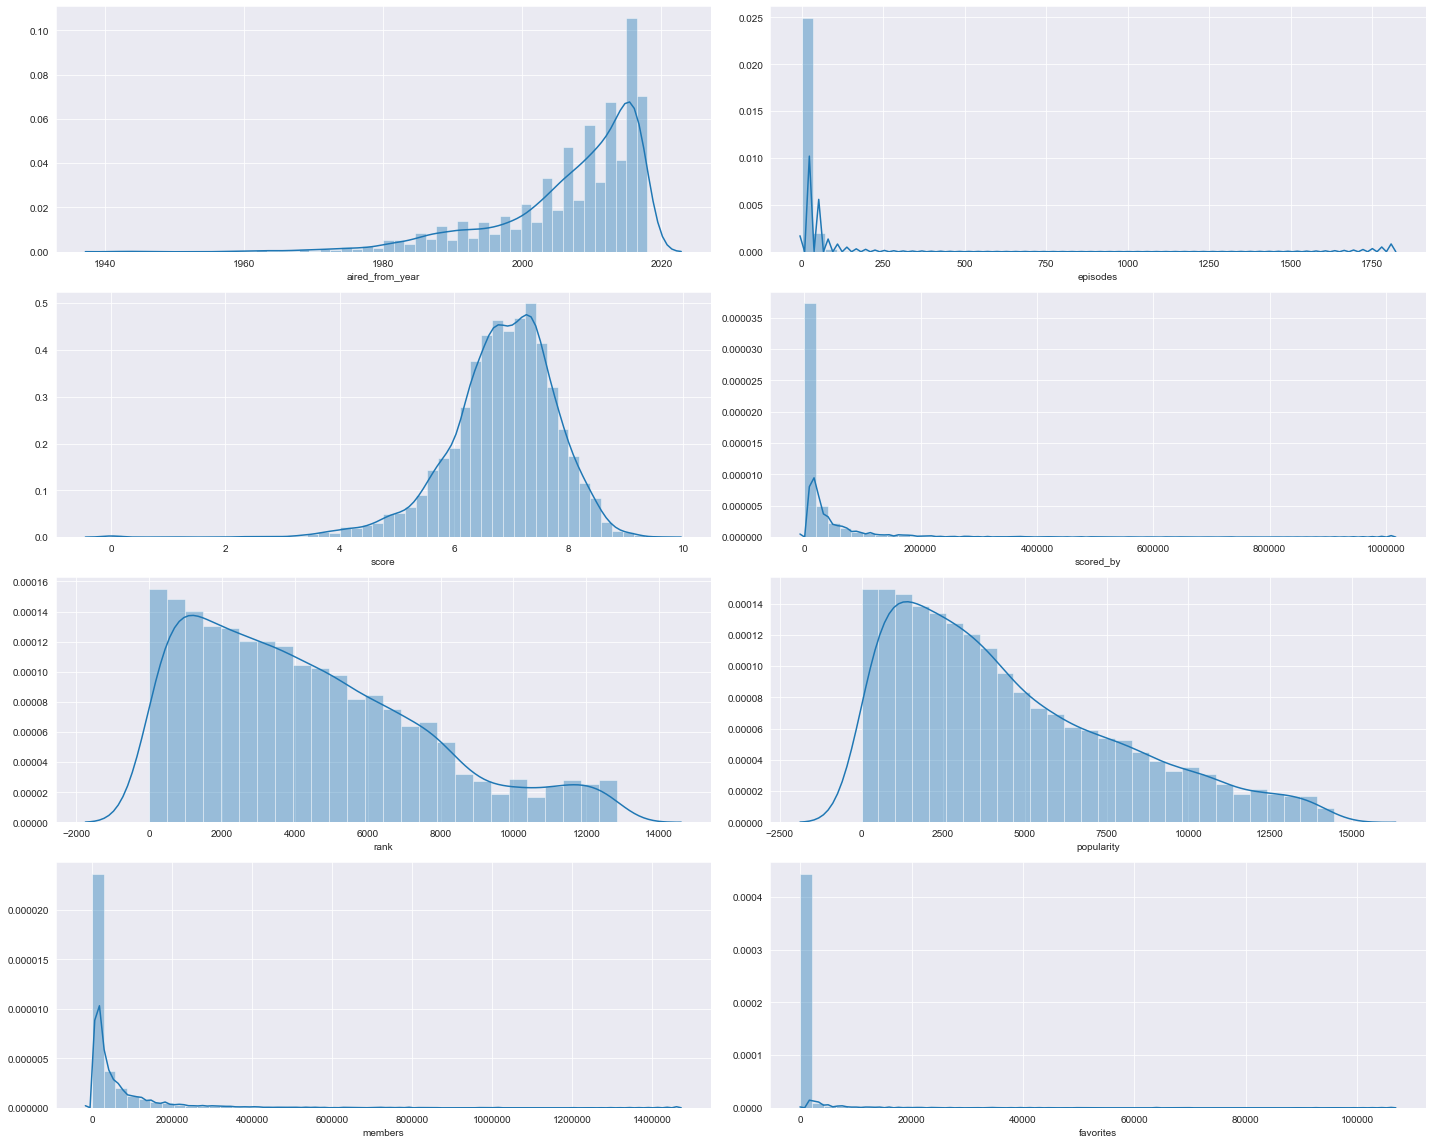

In [46]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = df_number_set.columns.dropna()
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_number_set[col[index]].dropna(how='all'), ax = ax[i][j])
        index = index + 1
plt.tight_layout()

### This pairing showed the highest correlation

# Total # of Scores vs Total # of Members

In [47]:
cols = df.columns
for index,x in enumerate(cols):
    print(f'{index} = column {x}')

0 = column title
1 = column type
2 = column source
3 = column episodes
4 = column rating
5 = column score
6 = column scored_by
7 = column rank
8 = column popularity
9 = column members
10 = column favorites
11 = column duration_min
12 = column aired_from_year


In [50]:
#selecting the columns in the data and labeling them 
score=df_le.iloc[:,5]
score_by=df_le.iloc[:,6]
rank=df_le.iloc[:,7]
popularity=df_le.iloc[:,8]
members=df_le.iloc[:,9]
favorites=df_le.iloc[:,10]
duration_min=df_le.iloc[:,11]
aired_from_year =df_le.iloc[:,12]

#Assigning X and y values aswell as the train and test of X and y

X1 = score_by.values.reshape(-1,1)
y1 = members.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)



In [51]:
y1_test.shape

(1894,)

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [52]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.9740893201397741
Linear Regression test accuracy is: 0.9748442529239484
Avg Cross Val Linear Regression is: 0.9732720875461481


In [53]:
scored_by_test = X1_test.reshape(1, -1)
members_test = y1_test.reshape(1, -1)
lr_members_predict = y1_pred_lr.reshape(1, -1)
cross_val_lr_members_predict = cv_pred_lr.reshape(1, -1)

d1 = pd.DataFrame(np.hstack([y1_test]))
d2 = pd.DataFrame(np.hstack([y1_pred_lr]))
d3 = pd.DataFrame(np.hstack([cv_pred_lr]))

# pd.DataFrame([[y1_test],[y1_pred_lr],[cv_pred_lr]])
# df1_transposed = df1.transpose()
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)


pd.DataFrame(np.concatenate([df1, df2, df3], axis=1), columns= ['Test set Members','Linear Reg Predicted Members','Cross Val. Linear Reg Predicted Members '])



Test set Members  Linear Reg Predicted Members  \
0               7273.0                  12159.191254   
1               1810.0                   8752.564939   
2               4730.0                  11560.409866   
3                345.0                   7243.771160   
4                361.0                   7208.250230   
...                ...                           ...   
1889            7316.0                   9941.670351   
1890           17569.0                  18221.429939   
1891             890.0                   7318.195965   
1892           89699.0                  76262.629222   
1893           95014.0                  91954.422827   

      Cross Val. Linear Reg Predicted Members   
0                                 11697.609079  
1                                  8246.640847  
2                                 11091.033729  
3                                  6718.208045  
4                                  6682.224761  
...                                        ...  
1889                               9214.437945  
1890                              17596.557166  
1891                               6558.530506  
1892                              76355.298528  
1893                              92241.084027  

[1894 rows x 3 columns]

In [54]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.9740893201397741
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9748442529239484
Ridge Regression @ alpha = 100 train accuracy is:  0.9740893201397741
Ridge Regression @ alpha = 100 test accuracy is:  0.9748442529238408
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.9732720875461481
Avg Cross Val Ridge Regression alpha @ 100 is:  0.9732720875461152


In [55]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.01 test accuracy is:  0.9748442529239203
Lasso Regression @ alpha 0.05 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.05 test accuracy is:  0.9748442529238078
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9732720875461363
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.9732720875460894


In [57]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn5_accuracy_train = knn5.score(X1_train,y1_train)
knn5_accuracy_test = knn5.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


K_nearest Neighbor = 1 Regression train accuracy is 0.0
K_nearest Neighbor = 1 Regression test accuracy is 0.8817317845828934

K_nearest Neighbor = 5 Regression train accuracy is 0.0
K_nearest Neighbor = 5 Regression test accuracy is 0.1979936642027455


In [58]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)
 
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1} and Random Forest Classifier test accuracy is {rf_accuracy_test_1}')


Random Forest Classifier train accuracy is 0.8026256224535989 and Random Forest Classifier test accuracy is 0.0


Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [59]:

# k_range= range(1,20)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1_train, y1_train)
# #     y1_pred_knn = knn.predict(X1_test)
#     scores.append(knn.score(X1_test,y1_test))
# plt.plot(k_range,scores)


# Ploting the Predicted Values for each model

Original Dataset


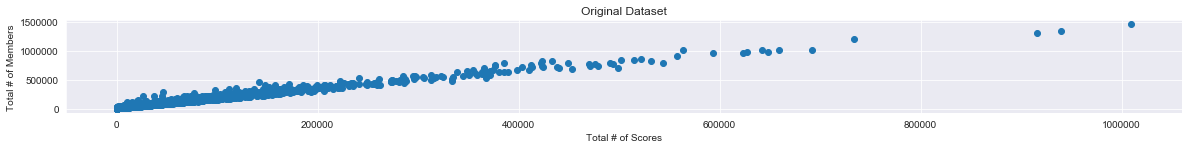

Predicted Model for Linear Regression


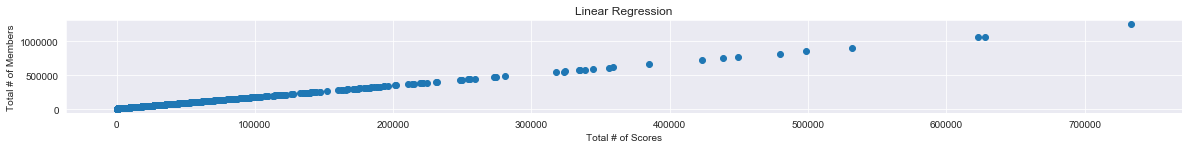

Predicted Cross Validation Model for Linear Regression


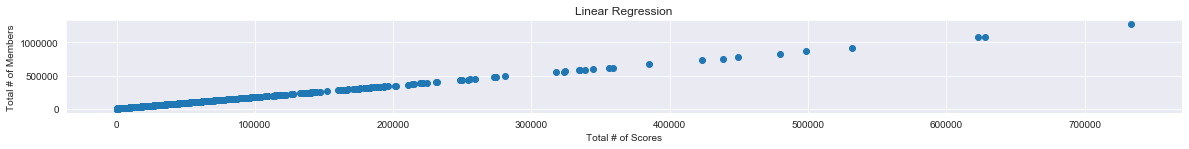

Predicted Model for Logistic Regression


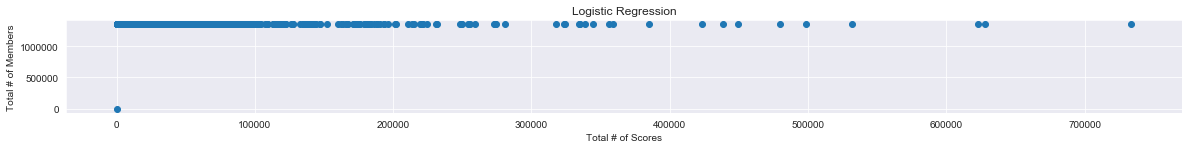

Predicted Model for Ridge Regression @ alpha = 0.01


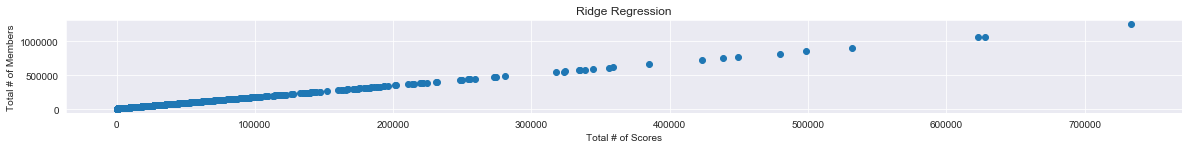

Predicted Model for Lasso Regression @ alpha = 0.01


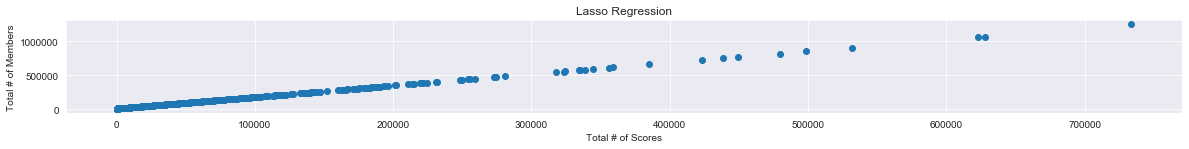

Predicted Model for K-nearest Neighbors Regression @ 1


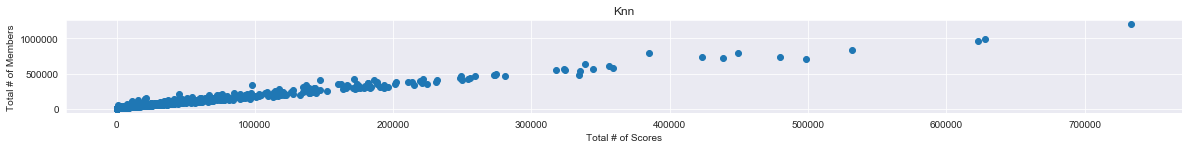

Predicted Model for Random Forest Classifier @ N Estimators 100


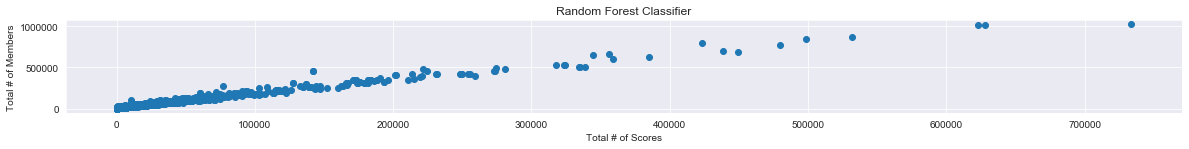

In [60]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()



# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Rank against Score

In [61]:
#Assigning X and y values aswell as the train and test of X and y
X2 = rank.values.reshape(-1,1)
y2 = score.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [62]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


Linear Regression train accuracy is: 0.813927834467458
Linear Regression test accuracy is: 0.780950853730388
Avg Cross Val Linear Regression is: 0.8165595808980379


In [63]:
X2_test.shape

(1263, 1)

In [64]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.813927834467458
Ridge Regression test accuracy is: 0.7809508537304117
Ridge Regression train accuracy is: 0.813927834467458
Ridge Regression test accuracy is: 0.7809508539669692


In [65]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.8139278344561724
Lasso Regression @ alpha 0.01 test accuracy is: 0.7809512958384164
Lasso Regression @ alpha 0.00001 train accuracy is: 0.813927834467458
Lasso Regression @ alpha 0.00001 test accuracy is: 0.7809508541725085


Original Data


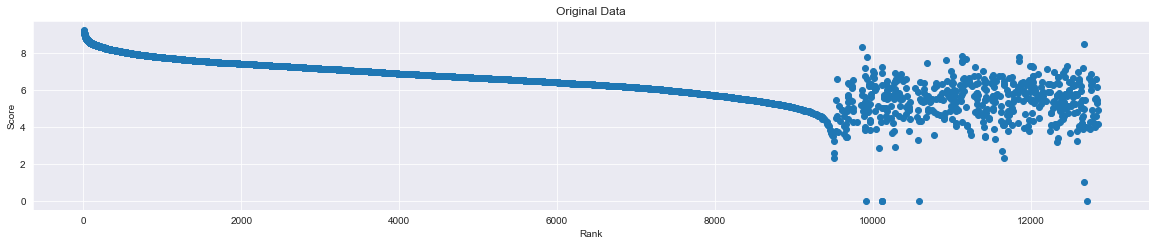

Predicted Model Linear Regression


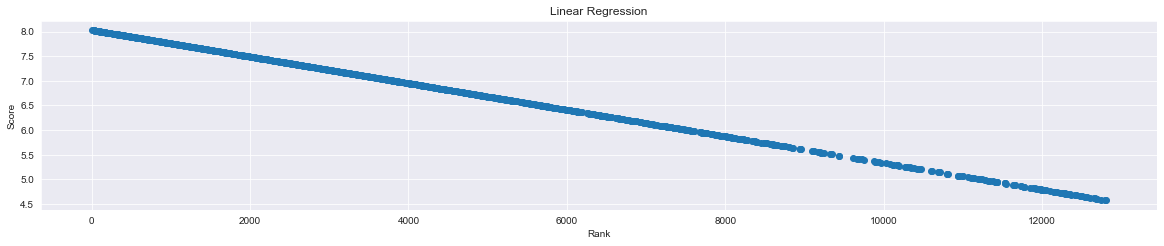

Predicted Cross Validation Model Linear Regression


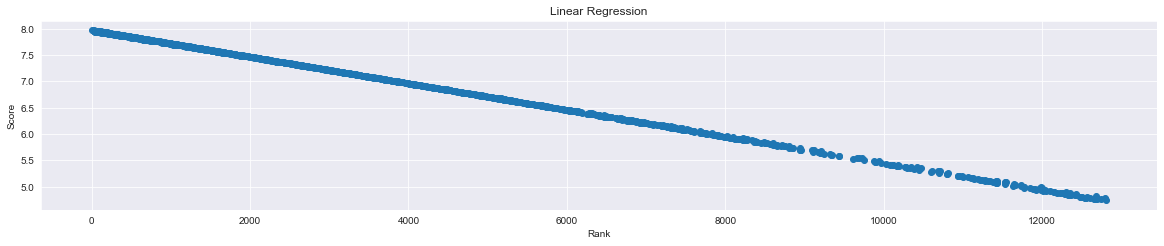

Predicted Model Ridge Regression


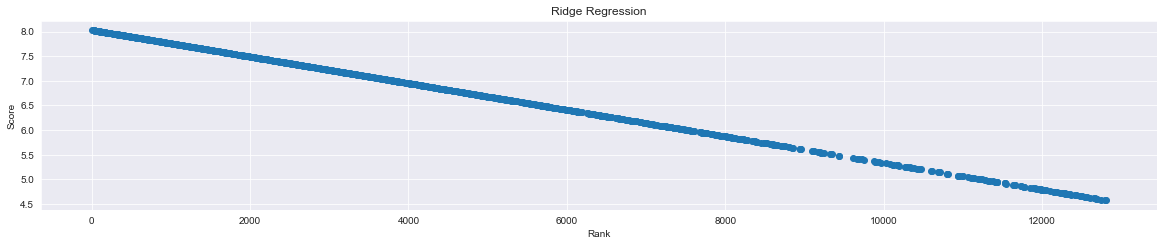

Predicted Model Lasso Regression


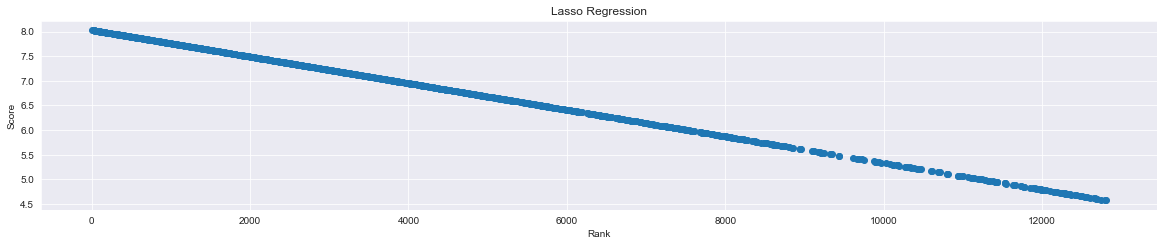

In [70]:
# ploting Linear Regression model

print('Original Data')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2,y2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Original Data')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Cross Validation Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,cv_pred_lr2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_rr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lasso01)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.show()

# Multiple Linear Regression

In [100]:
def multi_linear_regression_modeling(independent_variable,dependent_variable):
    #  fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression().fit(independent_variable,dependent_variable)
    # assigning predictions to global variable (Yhat_mlr) to be called outside of function, using independent variable(X)
    globals() ['Yhat_mlr'] = mlr.predict(independent_variable)
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...     ##
    # intercept (a)
    print(f'The intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line is {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    
    # printing the multiple linear regression formula with variables plugged in
    formula = (f'\033[1m{dependent_variable.name}\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula)   
    
    globals() ['r_square'] = mlr.score(independent_variable,dependent_variable)
    print(f'\n\n\033[1mThe R-square is: {r_square}\033[0m')
    print(f'We can say that \033[1m~{round(r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(dependent_variable, Yhat_mlr)
    print(f'\033[1mThe mean square error of price and predicted values is: \033[0m', mse)
    
    
    plt.figure(figsize=(12, 10))
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion of Anime')

    plt.show()
    plt.close()

In [101]:
X = df_le.drop(['title','score'],axis=1)
Y = df_le['score']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=3)


The intercept of the regression line is 6.876735224810314
The slopes of the regression line is [ 8.81183037e-03 -2.55348710e-03  1.75131774e-03 -2.13228266e-03
 -2.89433605e-06 -2.59667776e-04  9.85415018e-06  2.06741877e-06
  9.92708478e-06  2.37689537e-03  4.62591015e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... 
Plugging in the actual values the multiple linear regression formula:
score = 6.876735224810314 + (0.008811830374222642 * type) + (-0.0025534871023349466 * source) + (0.0017513177366434206 * episodes) + (-0.0021322826593518545 * rating) + (-2.8943360467924197e-06 * scored_by) + (-0.0002596677764338733 * rank) + (9.854150175292223e-06 * popularity) + (2.067418767448797e-06 * members) + (9.927084780317757e-06 * favorites) + (0.0023768953720029614 * duration_min) + (0.0004625910152780314 * aired_from_year)


The R-square is: 0.8183936035825073
We can say that ~81.84% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'episo

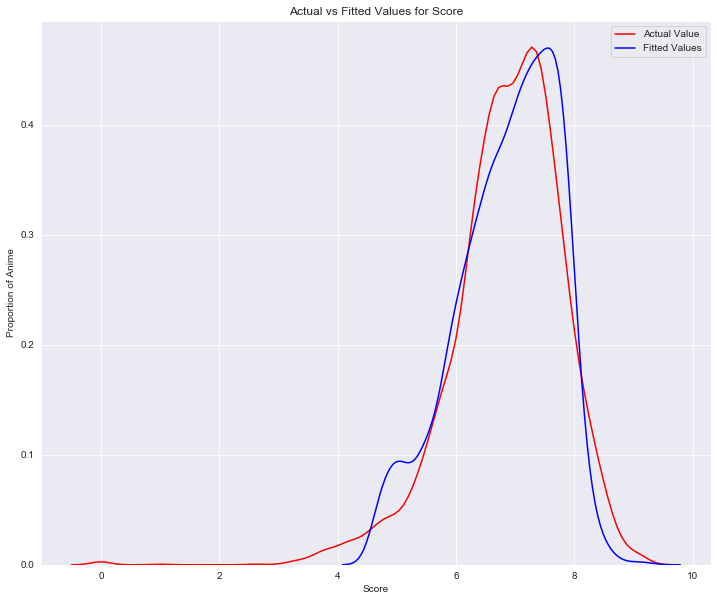

In [102]:
multi_linear_regression_modeling(X_train, y_train)

In [103]:
Yhat_mlr.shape

(4418,)

In [104]:
X.shape

(6312, 11)

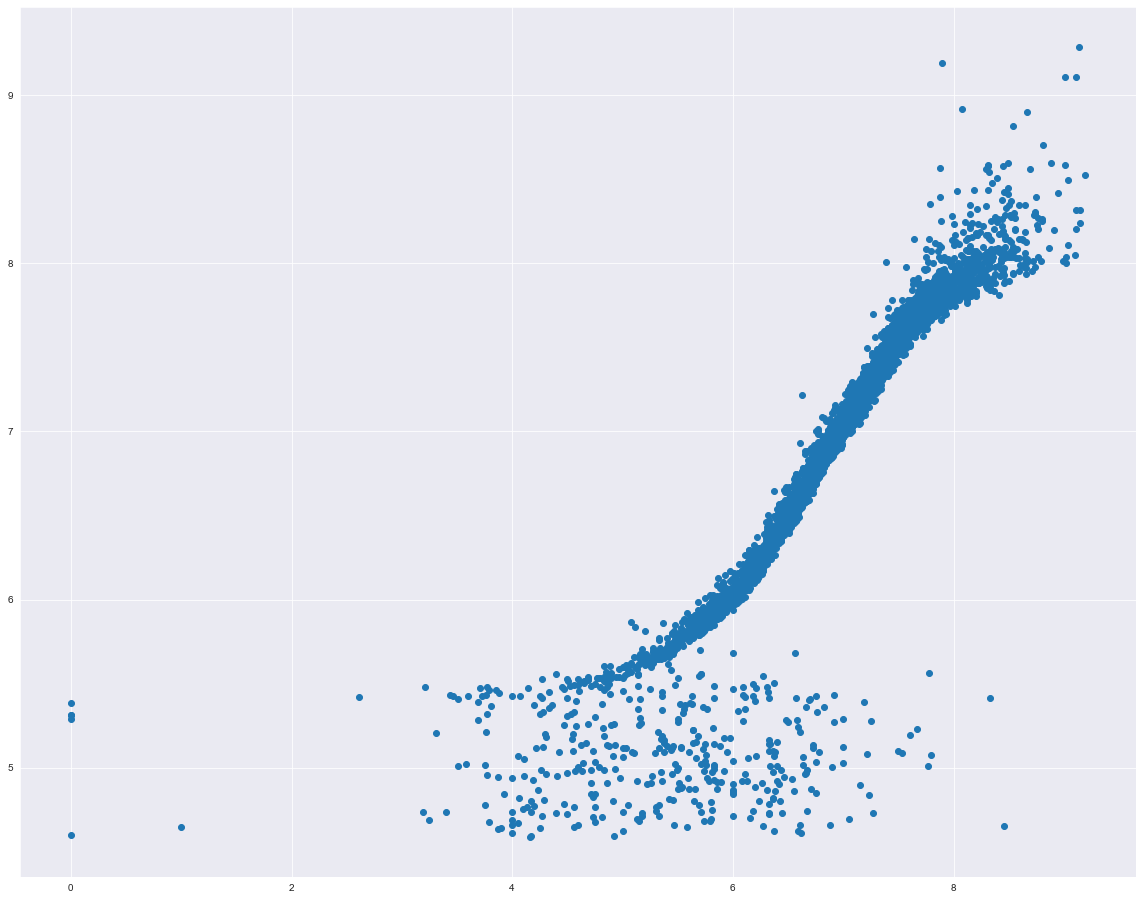

In [105]:
plt.figure(figsize=(20,16))
plt.scatter(y_train,Yhat_mlr)

## Manual input Anime info to predict

### running anime Demon Slayer's information through my model

In [106]:
demon_slayer_anime = [[5,6,26,4,966203,63,22,1567326,72436,23.0,2019]]
print(f'the predicted anime score is: {mlr.predict(demon_slayer_anime)}')

the predicted anime score is: [9.07785749]


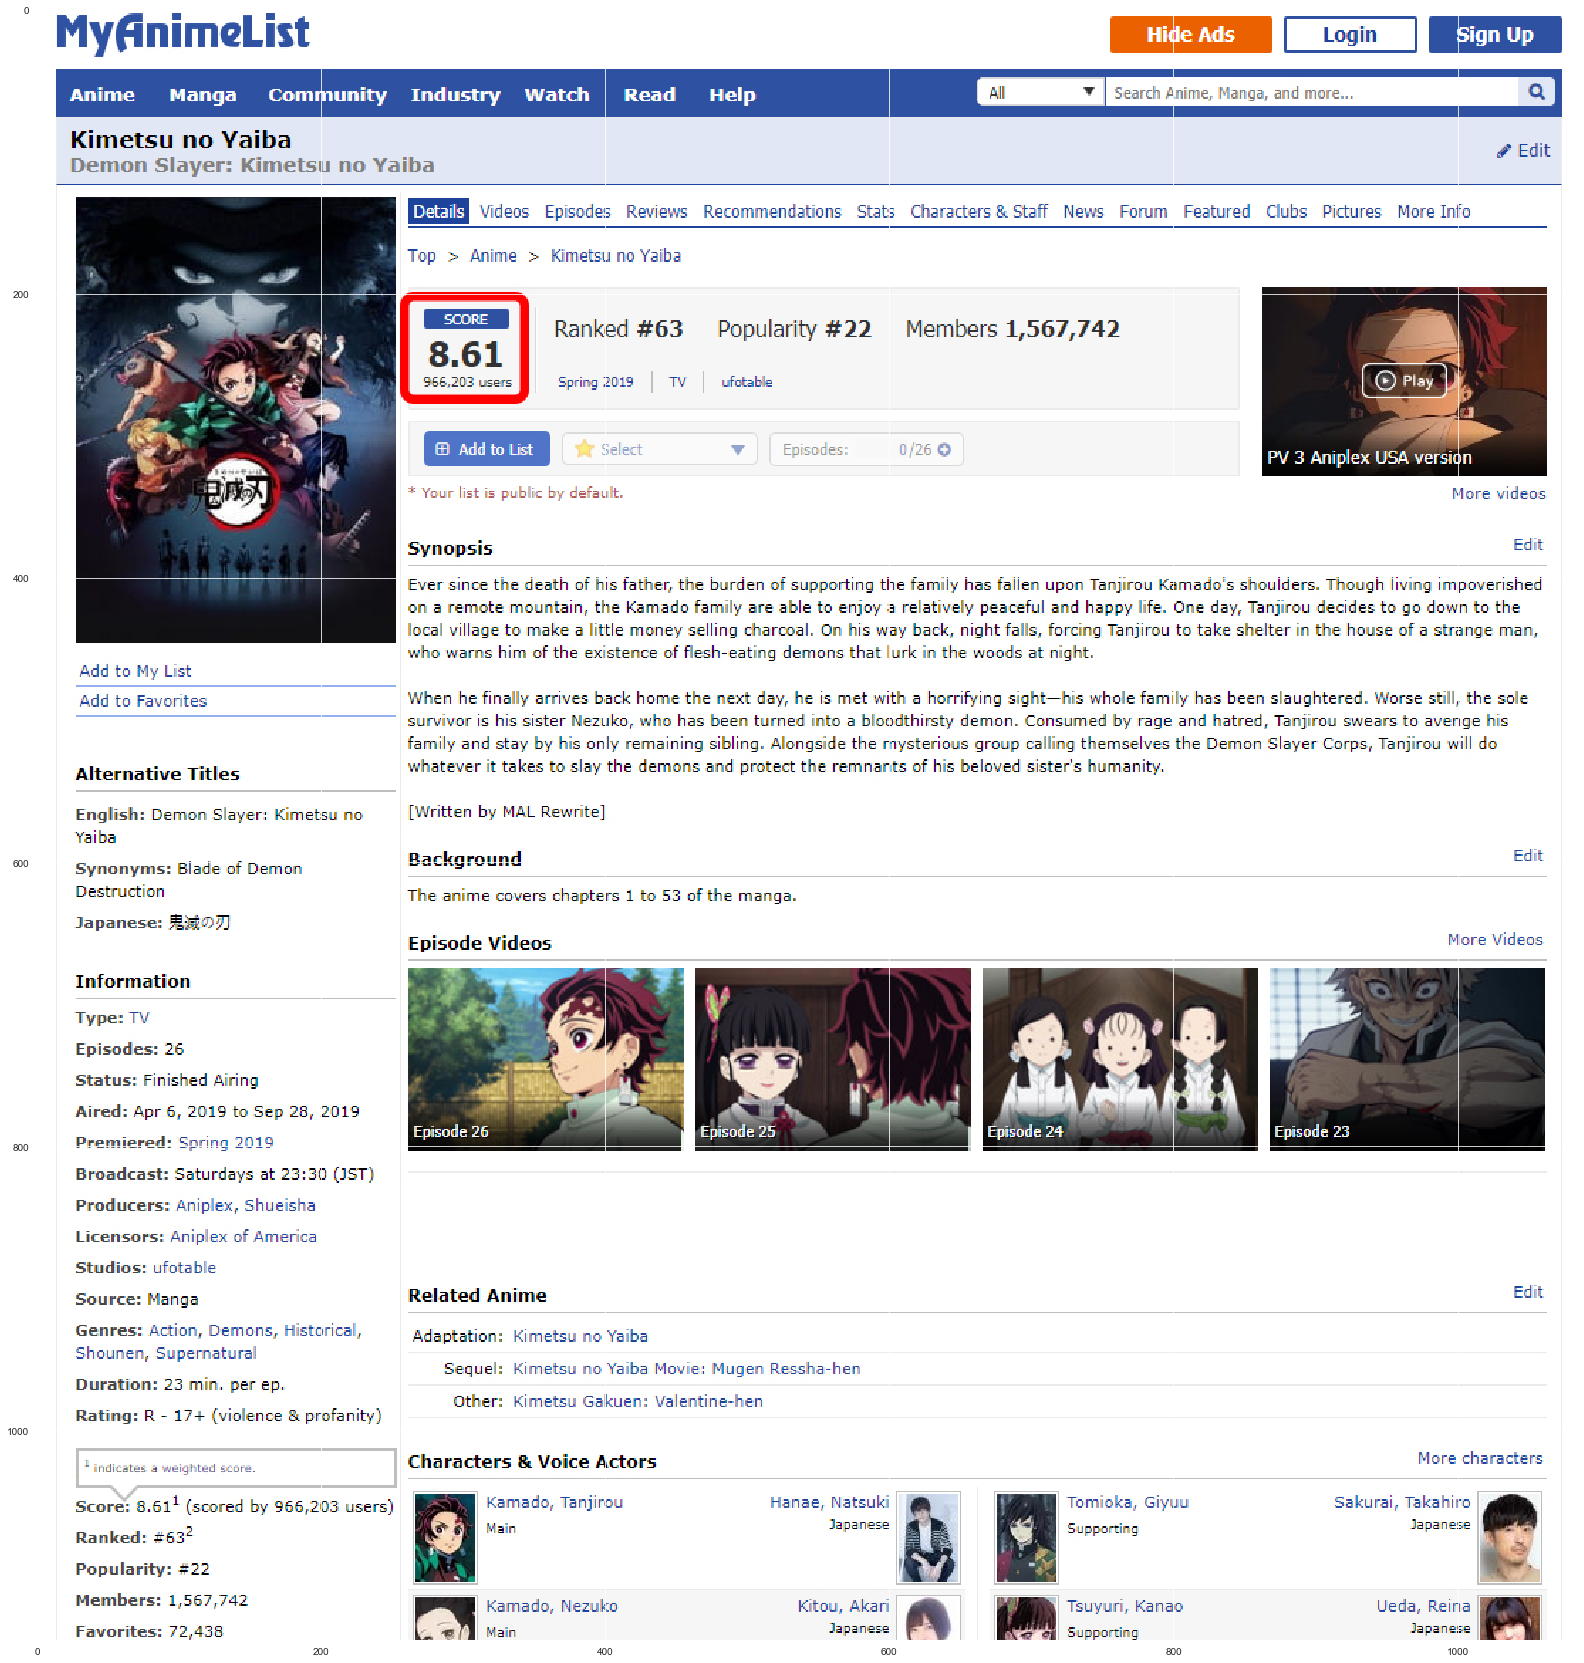

In [107]:
img = plt.imread('images\demon_slayer_info.jpg')
plt.figure(figsize = (28,30))
plt.imshow(img)

### running anime Dororo's information through my model

In [108]:
dororo_anime = [[5,6,24,4,341122,322,137,730890,12071,24.0,2019]]
print(f'the predicted anime score is: {mlr.predict(dororo_anime)}')

the predicted anime score is: [8.49129353]


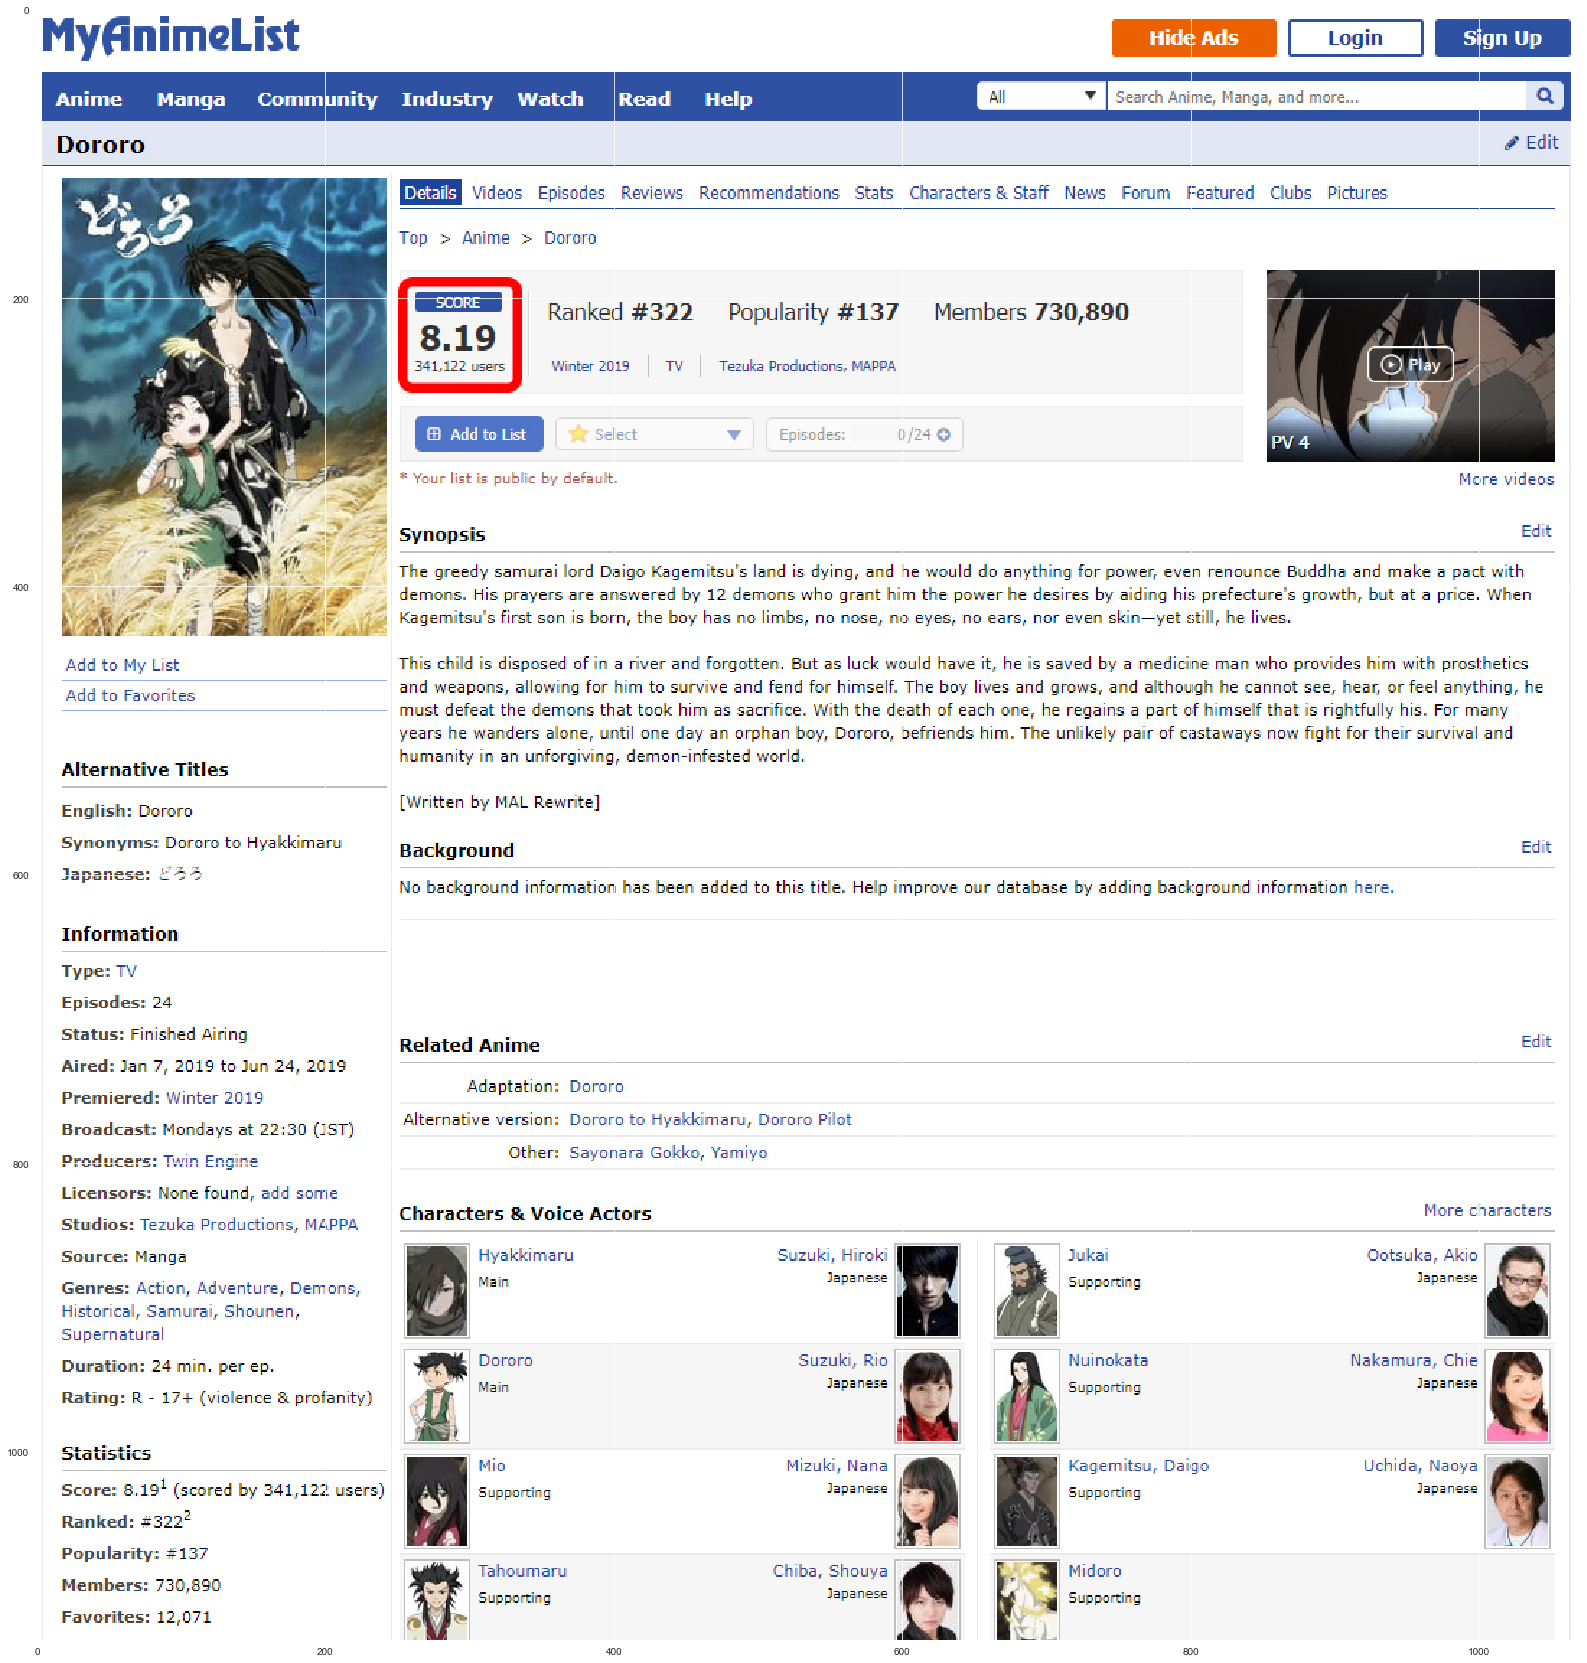

In [109]:
img = plt.imread('images\dororo_info.jpg')
plt.figure(figsize = (28,30))
plt.imshow(img)